# Debugging

## Questions

- How can I debug my program?

## Objectives

- Debug code containing an error systematically.

- Identify ways of making code less error-prone and more easily tested.

- Understand the concept, and benefits of, rubber duck debugging

Once testing has uncovered problems, the next step is to fix them. Many novices do this by making more-or-less random changes to their code until it seems to produce the right answer, but that’s very inefficient (and the result is usually only correct for the one case they’re testing). The more experienced a programmer is, the more systematically they debug, and most follow some variation on the rules explained below.


# Know What It’s Supposed to Do

The first step in debugging something is to know what it’s supposed to do. “My program doesn’t work” isn’t good enough: in order to diagnose and fix problems, we need to be able to tell correct output from incorrect. If we can write a test case for the failing case — i.e., if we can assert that with *these* inputs, the function should produce *that* result — then we’re ready to start debugging. If we can’t, then we need to figure out how we’re going to know when we’ve fixed things.

But writing test cases for scientific software is frequently harder than writing test cases for commercial applications, because if we knew what the output of the scientific code was supposed to be, we wouldn’t be running the software: we’d be writing up our results and moving on to the next program. In practice, scientists tend to do the following:

1. **Test with simplified data.** Before doing statistics on a real data set, we should try calculating statistics for a single record, for two identical records, for two records whose values are one step apart, or for some other case where we can calculate the right answer by hand.

2. **Test a simplified case.** If our program is supposed to simulate magnetic eddies in rapidly-rotating blobs of supercooled helium, our first test should be a blob of helium that isn’t rotating, and isn’t being subjected to any external electromagnetic fields. Similarly, if we’re looking at the effects of climate change on speciation, our first test should hold temperature, precipitation, and other factors constant.

3. **Compare to an oracle.** A test oracle is something whose results are trusted, such as experimental data, an older program, or a human expert. We use test oracles to determine if our new program produces the correct results. If we have a test oracle, we should store its output for particular cases so that we can compare it with our new results as often as we like without re-running that program.

4. **Check conservation laws.** Mass, energy, and other quantities are conserved in physical systems, so they should be in programs as well.

5. **Visualize.** Data analysts frequently use simple visualizations to check both the science they’re doing and the correctness of their code (just as we did in the opening lesson of this tutorial). This should only be used for debugging as a last resort, though, since it’s very hard to compare two visualizations automatically.


# Make It Fail Every Time

We can only debug something when it fails, so the second step is always to find a test case that *makes it fail every time*. The “every time” part is important because few things are more frustrating than debugging an intermittent problem: if we have to call a function a dozen times to get a single failure, the odds are good that we’ll scroll past the failure when it actually occurs.

As part of this, it’s always important to check that our code is “plugged in”, i.e., that we’re actually exercising the problem that we think we are. Every programmer has spent hours chasing a bug, only to realize that they were actually calling their code on the wrong data set or with the wrong configuration parameters, or are using the wrong version of the software entirely. Mistakes like these are particularly likely to happen when we’re tired, frustrated, and up against a deadline, which is one of the reasons late-night (or overnight) coding sessions are almost never worthwhile.


# Make It Fail Fast

If it takes 20 minutes for the bug to surface, we can only do three experiments an hour. This means that we’ll get less data in more time and that we’re more likely to be distracted by other things as we wait for our program to fail, which means the time we are spending on the problem is less focused. It’s therefore critical to *make it fail fast.*

As well as making the program fail fast in time, we want to make it fail fast in space, i.e., we want to localize the failure to the smallest possible region of code:

1. The smaller the gap between cause and effect, the easier the connection is to find. Many programmers therefore use a divide and conquer strategy to find bugs, i.e., if the output of a function is wrong, they check whether things are OK in the middle, then concentrate on either the first or second half, and so on.

2. N things can interact in N! different ways, so every line of code that *isn’t* run as part of a test means more than one thing we don’t need to worry about.


# Change One Thing at a Time, For a Reason

Replacing random chunks of code is unlikely to do much good. (After all, if you got it wrong the first time, you’ll probably get it wrong the second and third as well.) Good programmers therefore *change one thing at a time, for a reason.* They are either trying to gather more information (“is the bug still there if we change the order of the loops?”) or test a fix (“can we make the bug go away by sorting our data before processing it?”).

Every time we make a change, however small, we should re-run our tests immediately, because the more things we change at once, the harder it is to know what’s responsible for what (those N! interactions again). And we should re-run all of our tests: more than half of fixes made to code introduce (or re-introduce) bugs, so re-running all of our tests tells us whether we have regressed.


# Keep Track of What You’ve Done

Good scientists keep track of what they’ve done so that they can reproduce their work, and so that they don’t waste time repeating the same experiments or running ones whose results won’t be interesting. Similarly, debugging works best when we keep track of what we’ve done and how well it worked. If we find ourselves asking, “Did left followed by right with an odd number of lines cause the crash? Or was it right followed by left? Or was I using an even number of lines?” Then it’s time to step away from the computer, take a deep breath, and start working more systematically.

Records are particularly useful when the time comes to ask for help. People are more likely to listen to us when we can explain clearly what we did, and we’re better able to give them the information they need to be useful.

> **Note on Version Control:** Version control is often used to reset software to a known state during debugging, and to explore recent changes to code that might be responsible for bugs. Most version control systems (e.g. git, Mercurial) have:
> - a blame command that shows who last changed each line of a file;
> - a bisect command that helps with finding the commit that introduced an issue.


# Be Humble

And speaking of help: if we can’t find a bug in 10 minutes, we should be *humble* and ask for help. Explaining the problem to someone else is often useful, since hearing what we’re thinking helps us spot inconsistencies and hidden assumptions. If you don’t have someone nearby to share your problem description with, get a [rubber duck](https://en.wikipedia.org/wiki/Rubber_duck_debugging)!

Asking for help also helps alleviate confirmation bias. If we have just spent an hour writing a complicated program, we want it to work, so we’re likely to keep telling ourselves why it should, rather than searching for the reason it doesn’t. People who aren’t emotionally invested in the code can be more objective, which is why they’re often able to spot the simple mistakes we have overlooked.

Part of being humble is learning from our mistakes. Programmers tend to get the same things wrong over and over: either they don’t understand the language and libraries they’re working with, or their model of how things work is wrong. In either case, taking note of why the error occurred and checking for it next time quickly turns into not making the mistake at all.

And that is what makes us most productive in the long run. As the saying goes, ["*Remember, a few hours of trial and error can save you several minutes of looking at the README.*"](https://twitter.com/iamdevloper/status/1060067235316809729?s=20). If we train ourselves to avoid making some kinds of mistakes, to break our code into modular, testable chunks, and to turn every assumption (or mistake) into an assertion, it will actually take us less time to produce working programs, not more.


# Exercise 1* - Debug with Colleagues

Find a couple of colleagues, preferably ones also taking this course, and as a group, go through the answer to Lesson 6, Exercise 1 below. I have introduced a number of bugs to the code. Find and correct the bugs until you get a working program. Which of the principles discussed above did you find helpful?


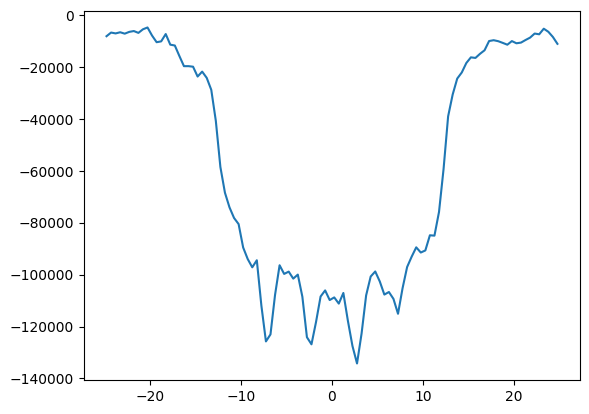

In [6]:
# Exercise 1* - Plotting Differences

# Plot the difference between the radiances found in simulations 02 and 04.

# 1. Load both from csv
# 2. Extract the radiance cross sections along the same location
# 3. Take the difference between the two arrays and plot them


import numpy as np
import matplotlib.pyplot as plt


sim = np.loadtxt(fname='simulation02.txt', skiprows=52)
x = sim[:, 0]
y = sim[:, 1]
rad = sim[:, 2]
# Find the closest y-value to 0
smallest_y = np.amin(abs(y))
x_cross_section = x[y==smallest_y]

luminance_cross_section02 = rad[y==smallest_y]

sim = np.loadtxt(fname='simulation03.txt', skiprows=52)
x = sim[:, 0]
y = sim[:, 1]
rad = sim[:, 2]
# Find the closest y-value to 0
smallest_y = np.amin(abs(y))
x_cross_section = x[y==smallest_y]

luminance_cross_section04 = rad[y==smallest_y]


diff = luminance_cross_section02 - luminance_cross_section04
plt.plot(x_cross_section, diff)

# Exercise 2* - Not Supposed to be the Same

You are assisting a researcher with Python code that computes the Body Mass Index (BMI) of patients. The researcher is concerned because all patients seemingly have unusual and identical BMIs, despite having different physiques. BMI is calculated as weight in kilograms divided by the square of height in metres.

Use the debugging principles in this exercise and locate problems with the code. What suggestions would you give the researcher for ensuring any later changes they make work correctly?

In [7]:
patients = [[70, 1.8], [80, 1.9], [150, 1.7]]

def calculate_bmi(weight, height):
    return weight / (height ** 2)

for patient in patients:
    weight, height = patient
    bmi = calculate_bmi(height, weight)
    print("Patient's BMI is: %f" % bmi)

Patient's BMI is: 0.000367
Patient's BMI is: 0.000297
Patient's BMI is: 0.000076


# Key Points

- Know what code is supposed to do before trying to debug it.

- Make it fail every time.

- Make it fail fast.

- Change one thing at a time, and for a reason.

- Keep track of what you have done.

- Be humble.

This work is derived from work that is Copyright © [Software Carpentry](http://software-carpentry.org/), under the CC-by [license](https://creativecommons.org/licenses/by/4.0/). The text has been paraphrased partially in some locations, with some additional exercises and images included, but the vast majority of the content is derived from the Software Carpentry lesson.